In [1]:
# Import libraries
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

# Exercise 1, 2, 3

In [2]:
# Directory containing data and images
data_dir = 'data/'

# X-ray image
im_org = io.imread(data_dir + 'metacarpals.png')

# Print dimensions of im_org
print('Image dimensions:', im_org.shape)
print('Image type:', im_org.dtype)

Image dimensions: (512, 512)
Image type: uint8


# Exercise 4

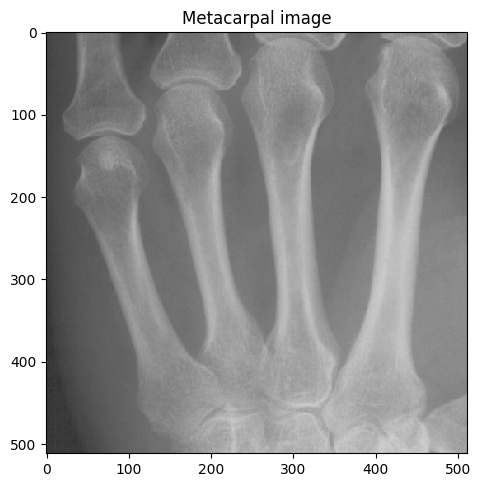

In [3]:
# Show im_org in grayscale
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

# Exercise 5, 6

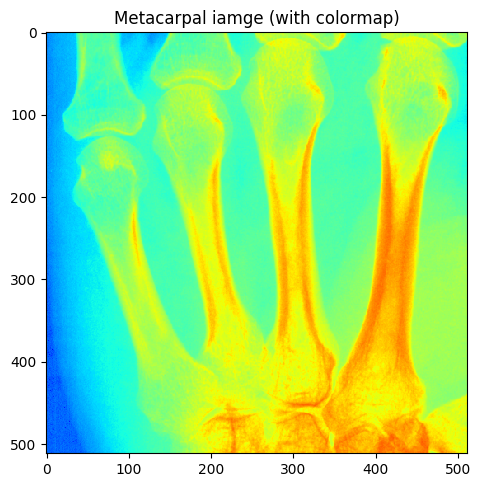

In [4]:
# Show image in color maps
io.imshow(im_org, cmap='jet')
plt.title('Metacarpal iamge (with colormap)')
io.show()

# Exercise 7

Min Value:  32
Max Value:  208


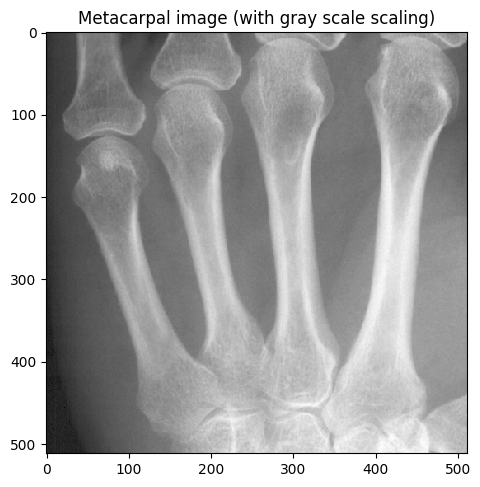

In [5]:
# Exercise 7: Show image in gray scale scaling
print("Min Value: ", np.min(im_org))
print("Max Value: ", np.max(im_org))
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray scale scaling)')
io.show()

# Exercise 8

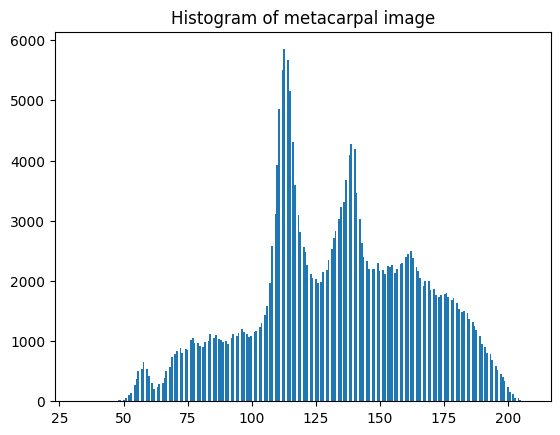

In [6]:
# Show histogram of image
h = plt.hist(im_org.ravel(), bins=256)
plt.title('Histogram of metacarpal image')
plt.show()

In [7]:
# Find value of given bin
bin = 100
count = h[0][bin]
print('Number of pixels in bin', bin, ':', count)

Number of pixels in bin 100 : 1147.0


In [8]:
# Find bin edges
bin_left = h[1][bin]
bin_right = h[1][bin + 1]
print('Bin edges:', bin_left, bin_right)

Bin edges: 100.75 101.4375


# Exercise 9

In [9]:
# Exercise 9: Find most common range of intensities
common_left = h[1][np.argmax(h[0])]
common_right = h[1][np.argmax(h[0])+1]
common_intensity = np.max(h[0])

print('The most common range is', common_left, 'to', common_right, "with value:", common_intensity)

The most common range is 112.4375 to 113.125 with value: 5848.0


In [10]:
# Find image value at coordinate
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


# Exercise 10

In [11]:
# Exercise 10
r = 110
c = 90
im_val = im_org[r,c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


# Exercise 11

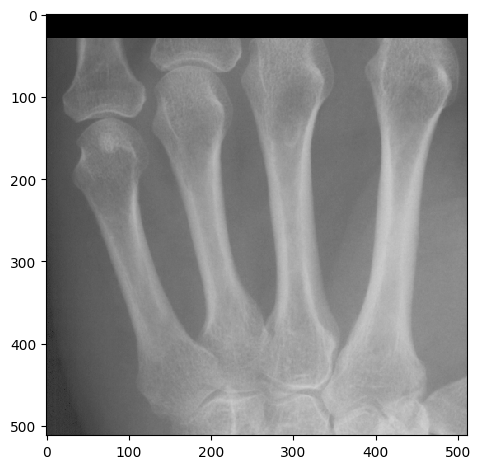

In [12]:
# Exercise 11
im_org[:30] = 0
io.imshow(im_org)
io.show()

# This code sets the first 30 rows of the image to 0, effectively blacking out the top of the image.

# Exercise 12

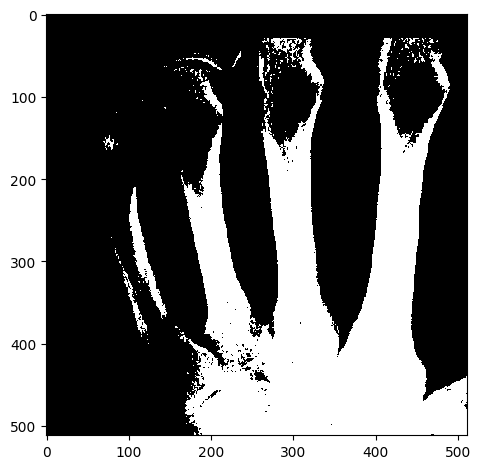

In [13]:
# Create a mask
mask = im_org > 150
io.imshow(mask)
io.show()

# Exercise 12
# The mask values are 1 if the pixel value is over 150, and 0 otherwise.

# Exercise 13

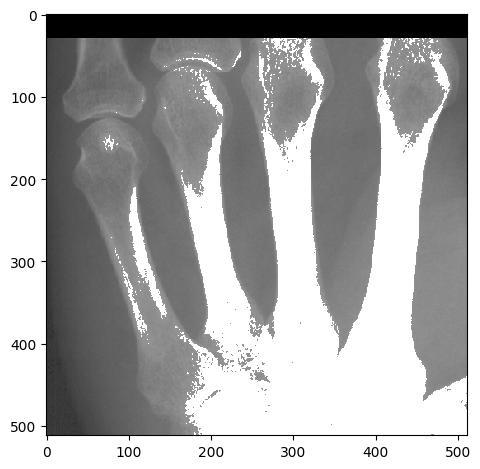

In [14]:
# This code will set all values over 150 to 255
im_org[mask] = 255
io.imshow(im_org)
io.show()

# Exercise 14

Image dimensions: (600, 800, 3)


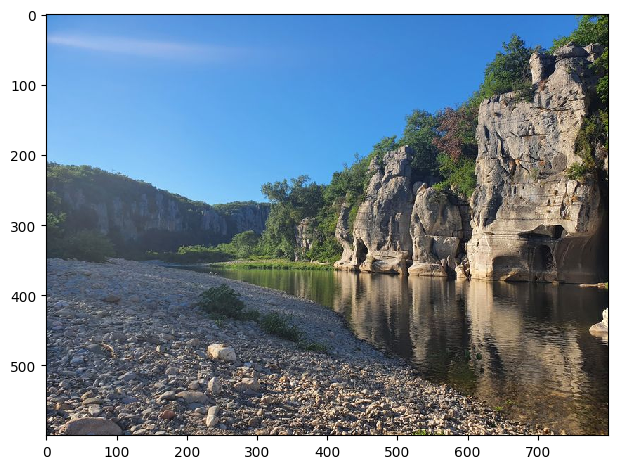

In [15]:
# Read color image and print dimensions
im_color = io.imread(data_dir + 'ardeche.jpg')
print("Image dimensions:", im_color.shape)
io.imshow(im_color)

# Exercise 15

In [16]:
# Find pixel value
r = 110
c = 90

im_val = im_color[r,c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


# Exercise 16

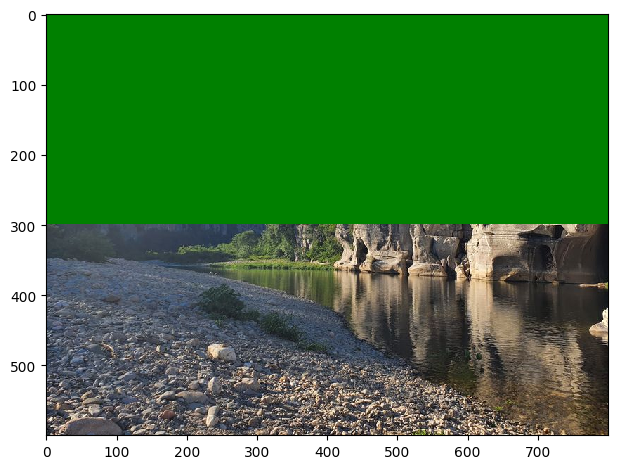

In [17]:
# Color top half of image green
r_2 = int(im_color.shape[0] / 2)
im_color[:300] = [0, 128, 0]
io.imshow(im_color)

# Exercise 17

Image dimensions: (3024, 4032, 3)


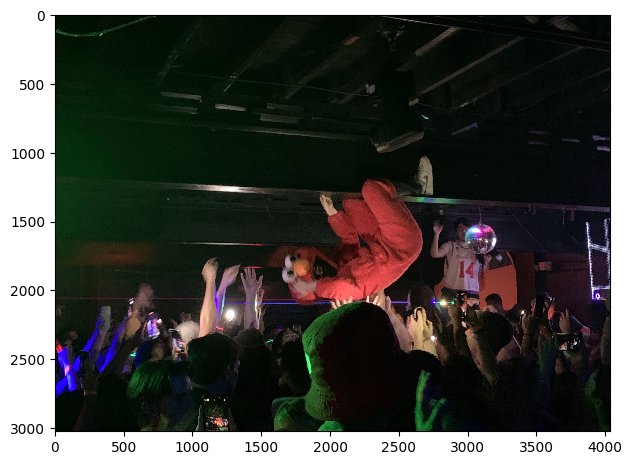

In [18]:
# Read custom image and examine size
im_org = io.imread(data_dir + 'dark.jpg')
print("Image dimensions:", im_org.shape)
io.imshow(im_org)

In [19]:
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)

# Exercise 18

Rescaled pixel type: float64
Max: 1.0
Min: 0.0


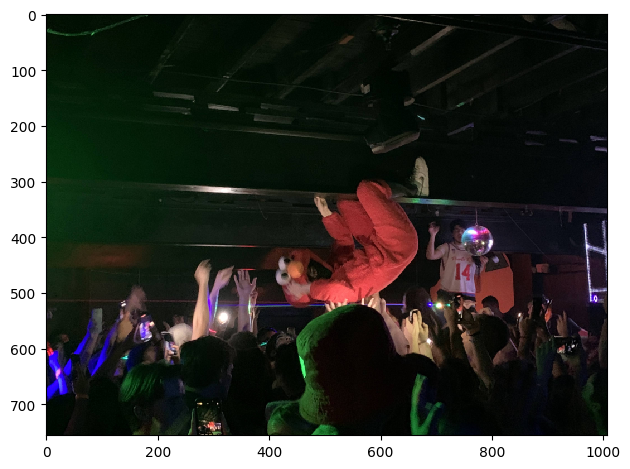

In [20]:
print("Rescaled pixel type:", image_rescaled.dtype)
io.imshow(image_rescaled)
print('Max:', image_rescaled.max())
print('Min:', image_rescaled.min())

# The resized image is not in range 0,255 but in range 0,1

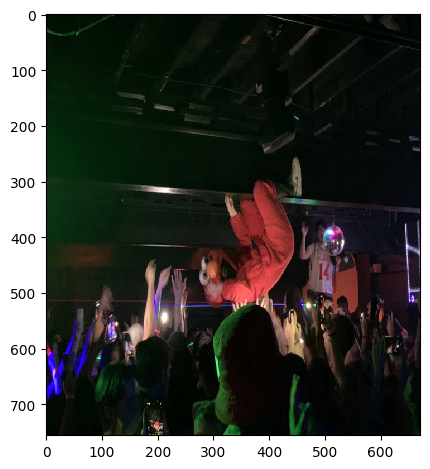

In [21]:
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)

io.imshow(image_resized)

# Exercise 19

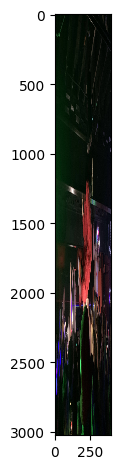

In [22]:
# Rescale image to always equal width 400
image_resized = resize(im_org, (im_org.shape[0],
                       400 ),
                       anti_aliasing=True)

io.imshow(image_resized)

# Exercise 19B

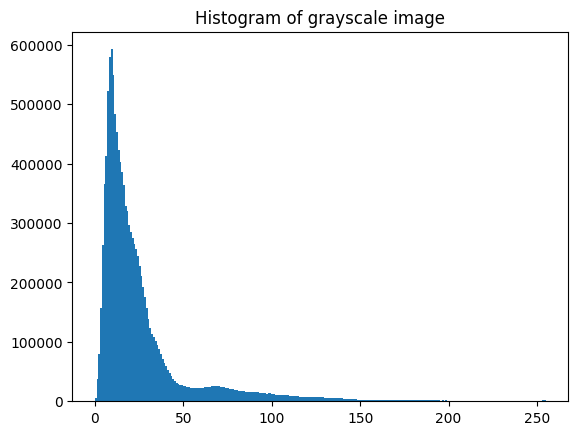

In [23]:
# Convert to grayscale
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)

# Show histogram of grayscale image
h = plt.hist(im_byte.ravel(), bins=256)
plt.title('Histogram of grayscale image')
plt.show()


# Exercise 20

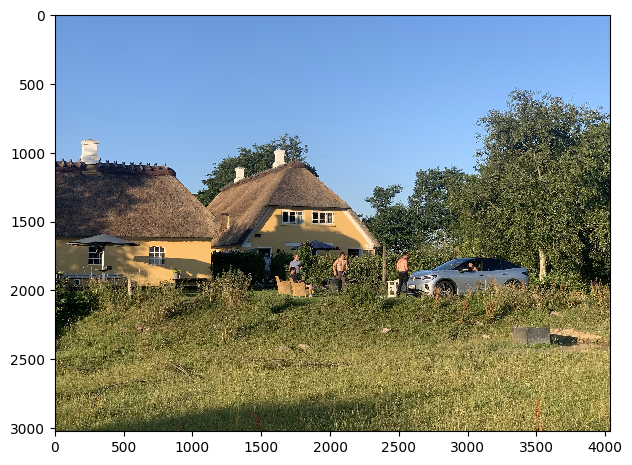

In [24]:
# Import light image
im_light = io.imread(data_dir + 'light.jpg')
io.imshow(im_light)

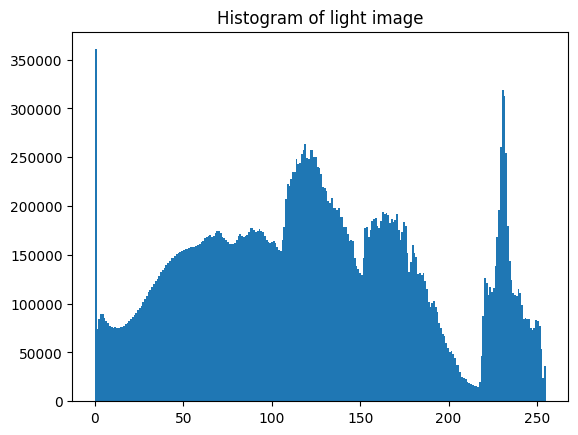

In [25]:
# Show histogram of light image
h = plt.hist(im_light.ravel(), bins=256)
plt.title('Histogram of light image')
plt.show()

# The histogram of the light image is shifted to the right, indicating that the image is brighter.

# Exercise 21

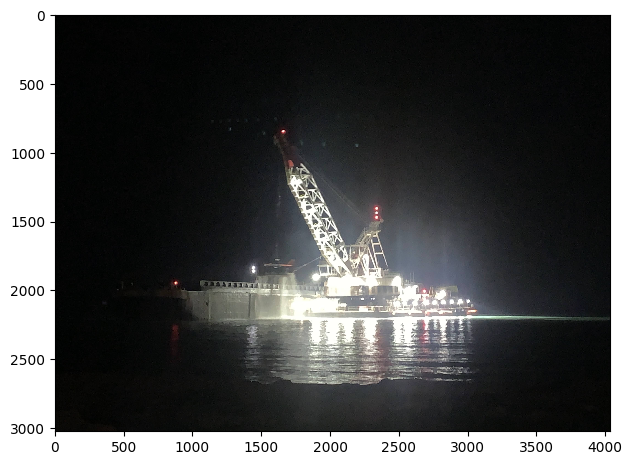

In [26]:
# Import image with light object on dark background
image_light_dark = io.imread(data_dir + 'light_on_dark.jpg')
io.imshow(image_light_dark)

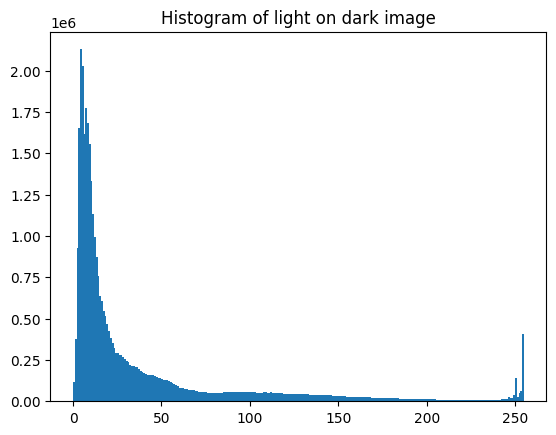

In [27]:
# Show histogram of light on dark image
h = plt.hist(image_light_dark.ravel(), bins=256)   
plt.title('Histogram of light on dark image')
plt.show()

# Exercise 22

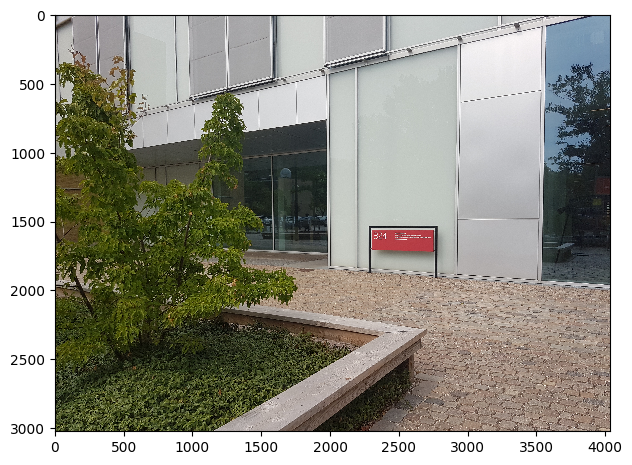

In [28]:
# Read DTU Sign image
im_org = io.imread(data_dir + 'DTUSign1.jpg')
io.imshow(im_org)

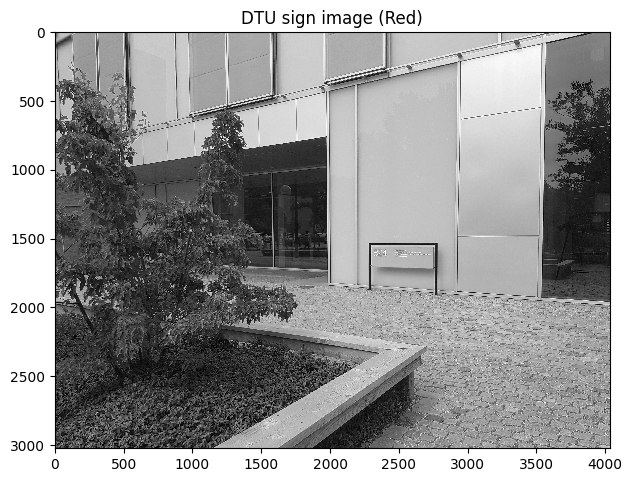

In [29]:
r_comp = im_org[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

# Exercise 23

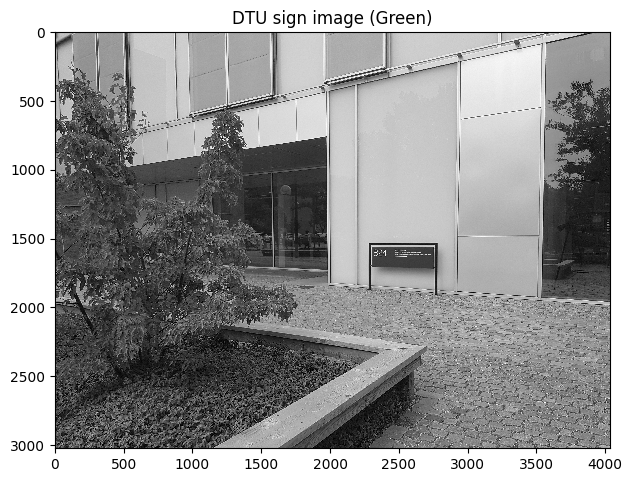

In [30]:
# Visualize G component individually
g_comp = im_org[:, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

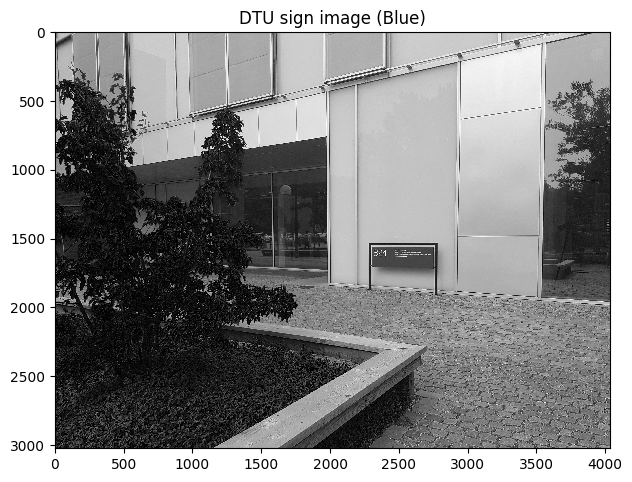

In [31]:
# Visualize B component individually
b_comp = im_org[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()

The sign is dark in G and B channels because it is primarily red, and G and B values are low to make the sign red. The walls are always bright because they are almost white, which has high values of RGB

# Exercise 24

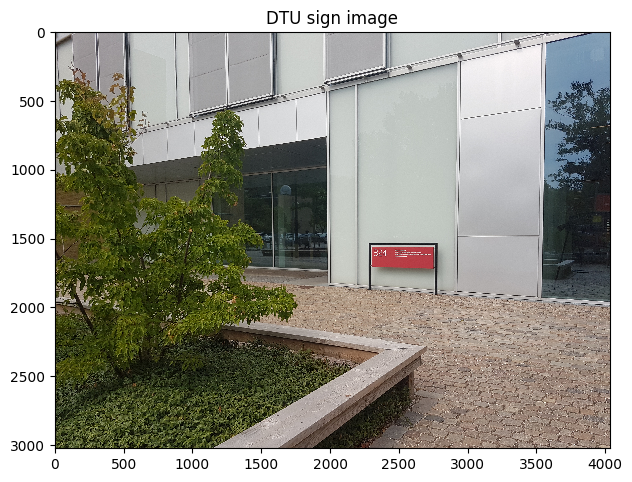

In [32]:
# Read and show the DTU Sign image
im_org = io.imread(data_dir + 'DTUSign1.jpg')
io.imshow(im_org)
plt.title('DTU sign image')
io.show()

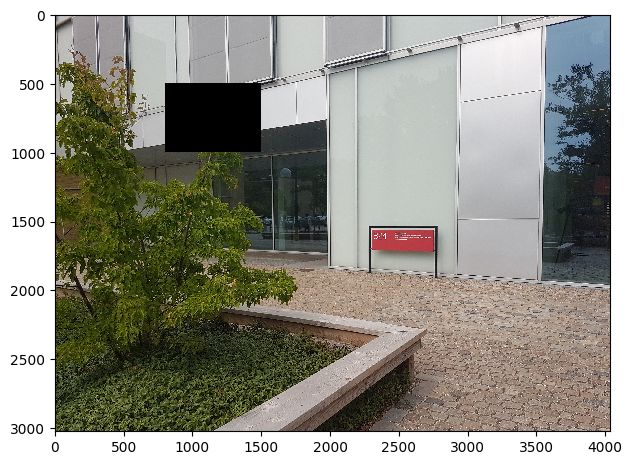

In [33]:
# Create a black rectangle
img_black = im_org.copy()
img_black[500:1000, 800:1500, :] = 0
io.imshow(img_black)

# Exercise 25

In [34]:
# Save image as png
io.imsave(data_dir + 'DTUSign1_black.png', img_black)

# Exercise 26

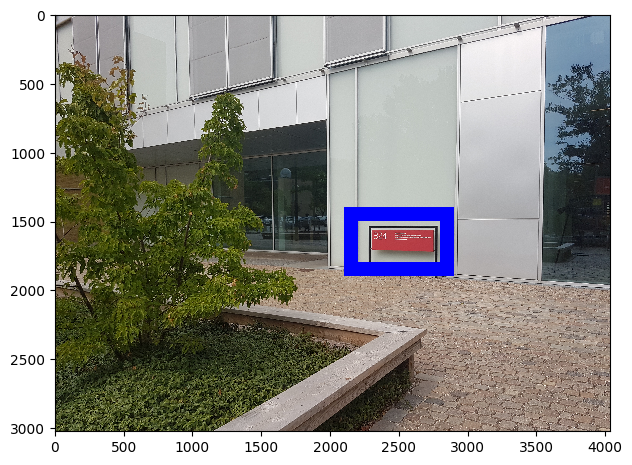

In [35]:
# Create blue rectangle around the sign
im_rectangle = im_org.copy()

# Top border
im_rectangle[1400:1500, 2100:2900, :] = [0, 0, 255]

# Bottom border
im_rectangle[1800:1900, 2100:2900, :] = [0, 0, 255]

# Left border
im_rectangle[1500:1800, 2100:2200, :] = [0, 0, 255]

# Right border
im_rectangle[1500:1800, 2800:2900, :] = [0, 0, 255]

io.imshow(im_rectangle)
io.imsave(data_dir + 'DTUSign1_rectangle.png', im_rectangle)

# Exercise 27

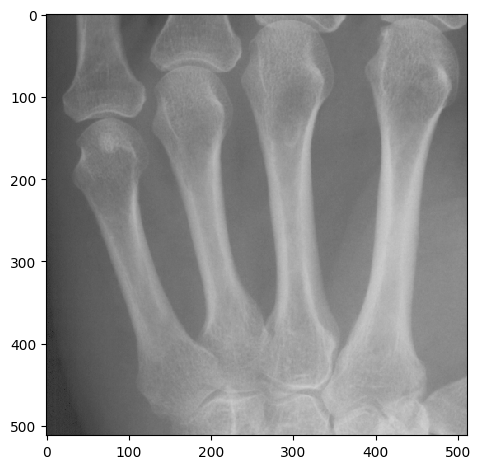

In [36]:
# Import metacarpals image
im_meta = io.imread(data_dir + 'metacarpals.png')
io.imshow(im_meta)  

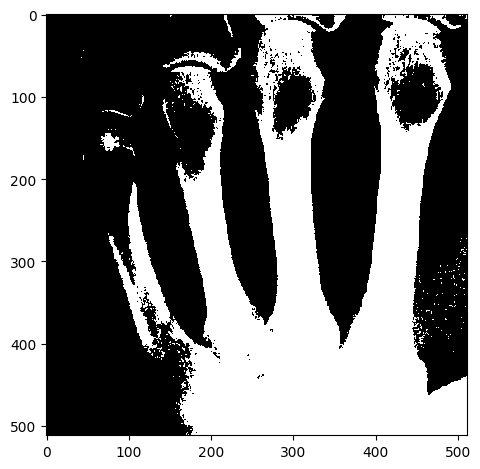

In [37]:
# Create a mask for values above 100
mask = im_meta > 142
io.imshow(mask)

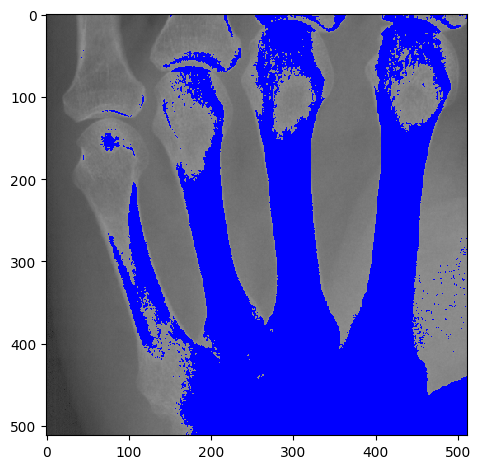

In [38]:
# Make original image colored
im_meta = color.gray2rgb(im_meta)

# Combine the mask with the original image and color the masked area blue
im_meta[mask] = [0, 0, 255]
io.imshow(im_meta)

# Exercise 28

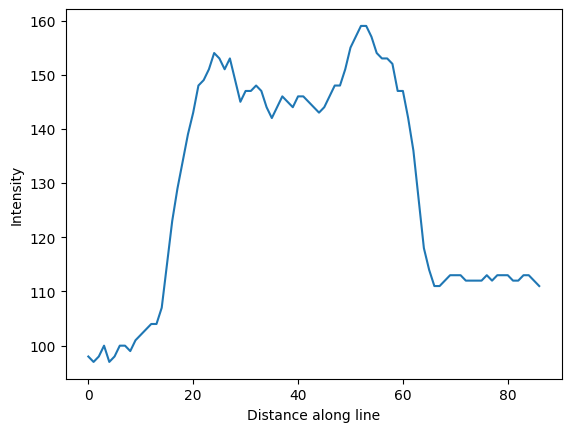

In [39]:
# Investigate properties of the hollow bone
im_org = io.imread(data_dir + 'metacarpals.png')
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

It measures the light intensity across the line the goes across the bone. We can se the 2 peaks are the walls of the bone, while the little valley between them is the hollow part of the bone

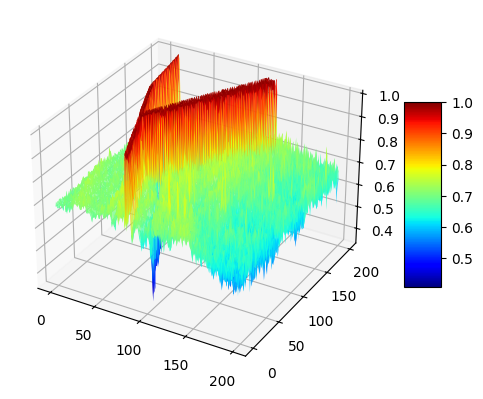

In [40]:
# View the image as a landscape
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Exercise 29

In [41]:
# Examine DICOM images
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008,0020) Study Date                          DA: '20140914'
(0008,0030) Study Time                          TM: ''
(0008,0050) Accession Number        

The image is 512 by 512

In [42]:
# Access pixel values
im = ds.pixel_array

# Exercise 30

In [43]:
print('Image resolution:', im.shape)
print('Image type:', im.dtype)

Image resolution: (512, 512)
Image type: int16


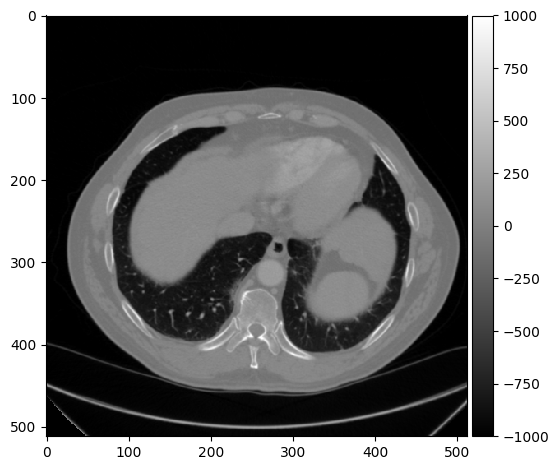

In [44]:
# Show the image
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()